<a href="https://www.kaggle.com/code/zeinaabmohamed/session-1?scriptVersionId=236260092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# NumPy

In [2]:
import numpy as np

In [3]:
# Creating an array from a list
arr1 = np.array([1, 2, 3, 4, 5])
print("Array from list:", arr1)

# Creating an array with zeros
arr2 = np.zeros((3, 3))  # 3x3 matrix of zeros
print("Zeros array:\n", arr2)

# Creating an array with ones
arr3 = np.ones((2, 4))  # 2x4 matrix of ones
print("Ones array:\n", arr3)

# Creating a range of numbers
arr4 = np.arange(0, 10, 2)  # Even numbers from 0 to 8
print("Arange array:", arr4)


Array from list: [1 2 3 4 5]
Zeros array:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Ones array:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Arange array: [0 2 4 6 8]


In [4]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr)
# Accessing a single element
print("Element at row 1, col 2:", arr[1, 2])

# Slicing: Extracting a submatrix
sub_arr = arr[:2, 1:]  # First two rows, columns 1 to end
print("Submatrix:\n", sub_arr)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
Element at row 1, col 2: 6
Submatrix:
 [[2 3]
 [5 6]]


# Pandas

In [5]:
import pandas as pd

## Creating Pandas Series & DataFrames

In [6]:
# Creating a Series
series = pd.Series([10, 20, 30], index=['A', 'B', 'C'])
print("Series:\n", series)

# Creating a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}

print(data)
df = pd.DataFrame(data)
print("\nDataFrame:\n", df)


Series:
 A    10
B    20
C    30
dtype: int64
{'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'Salary': [50000, 60000, 70000]}

DataFrame:
       Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


## Loading & Saving Data

In [7]:
# Load data from CSV (Ensure you have a 'data.csv' file)
# df = pd.read_csv('data.csv')

# Save DataFrame to CSV
df.to_csv('output.csv', index=False)

# Save DataFrame to Excel
df.to_excel('output.xlsx', index=False)

# Save DataFrame to JSON
df.to_json('output.json', orient='records')


## Indexing & Slicing Data

In [8]:
# Selecting a specific row by label
print("Row with label 'B':\n", series.loc['B'])

# Selecting multiple rows by index position
print("\nFirst two rows:\n", df.iloc[:2])

# Filtering data with conditions
filtered_df = df[df['Age'] > 25]
print("\nFiltered DataFrame (Age > 25):\n", filtered_df)


Row with label 'B':
 20

First two rows:
     Name  Age  Salary
0  Alice   25   50000
1    Bob   30   60000

Filtered DataFrame (Age > 25):
       Name  Age  Salary
1      Bob   30   60000
2  Charlie   35   70000


## Handling Missing Data

In [9]:
# Creating a DataFrame with missing values
import numpy as np
df_missing = df.copy()
df_missing.loc[1, 'Age'] = np.nan  # Introduce a NaN value
print("DataFrame with missing values:\n", df_missing)

# Identifying missing values
print("\nMissing values count:\n", df_missing.isnull().sum())

# Filling missing values
df_filled = df_missing.fillna(df_missing.mode())
print("\nDataFrame after filling missing values:\n", df_filled)

# Dropping missing values
df_dropped = df_missing.dropna()
print("\nDataFrame after dropping missing values:\n", df_dropped)


DataFrame with missing values:
       Name   Age  Salary
0    Alice  25.0   50000
1      Bob   NaN   60000
2  Charlie  35.0   70000

Missing values count:
 Name      0
Age       1
Salary    0
dtype: int64

DataFrame after filling missing values:
       Name   Age  Salary
0    Alice  25.0   50000
1      Bob  35.0   60000
2  Charlie  35.0   70000

DataFrame after dropping missing values:
       Name   Age  Salary
0    Alice  25.0   50000
2  Charlie  35.0   70000


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Data Aggregation & Grouping

In [10]:
# Grouping by a column and calculating the mean salary

df_grouped = df.groupby('Age')['Salary'].mean()
print("Grouped by Age:\n", df_grouped)

Grouped by Age:
 Age
25    50000.0
30    60000.0
35    70000.0
Name: Salary, dtype: float64


## Merging & Joining DataFrames

In [11]:
# Creating another DataFrame
df_extra = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Department': ['HR', 'IT']})

# Merging on 'Name'
df_merged = pd.merge(df, df_extra, on='Name', how='left')
print("Merged DataFrame:\n", df_merged)


Merged DataFrame:
       Name  Age  Salary Department
0    Alice   25   50000         HR
1      Bob   30   60000         IT
2  Charlie   35   70000        NaN


## Data Visualization with Pandas

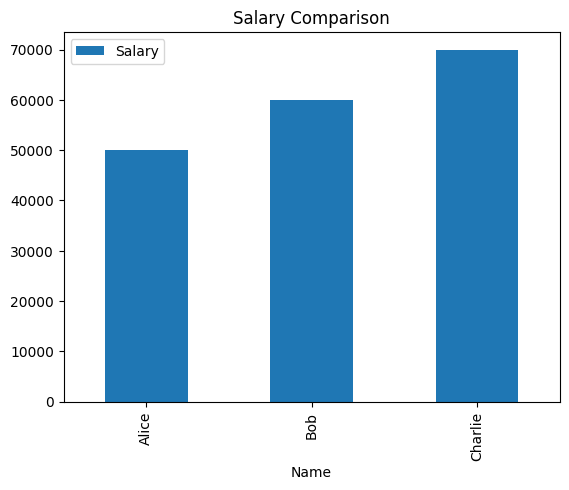

In [12]:
import matplotlib.pyplot as plt

# Plot a bar chart of Salary vs Name
# legend = True for identifying salary left
df.plot(kind='bar', x='Name', y='Salary', title='Salary Comparison', legend=True)
plt.show()


# Matplotlib

In [13]:
import matplotlib.pyplot as plt

## Basic Line Plot

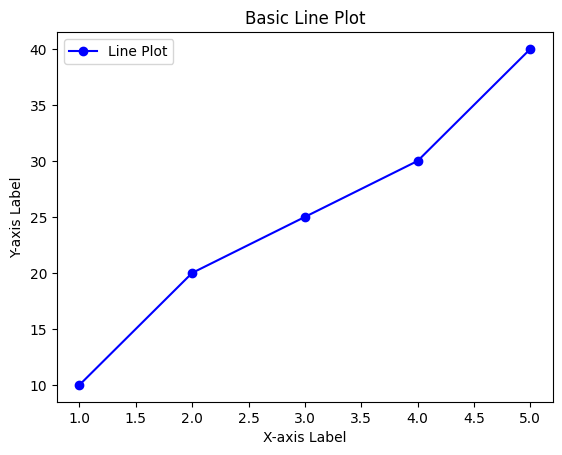

In [14]:
# Create data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

# Create a line plot
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Line Plot')

# Add labels and title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Basic Line Plot")

# Show the legend and plot
plt.legend()
plt.show()


## Scatter Plot

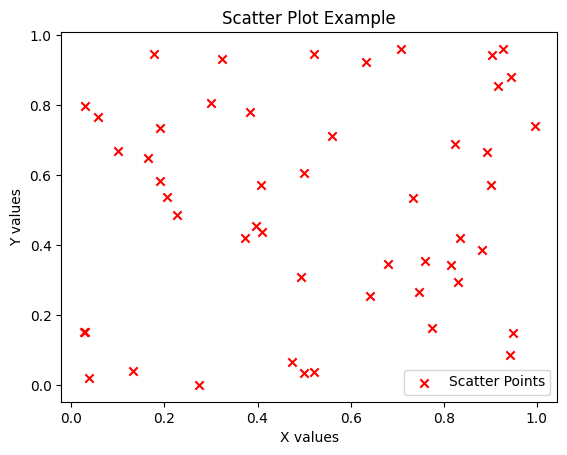

In [15]:
import numpy as np

# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

# Create scatter plot
plt.scatter(x, y, color='red', marker='x' , label='Scatter Points')

# Add labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot Example")

# Show legend and plot
plt.legend()
plt.show()


## Bar Chart

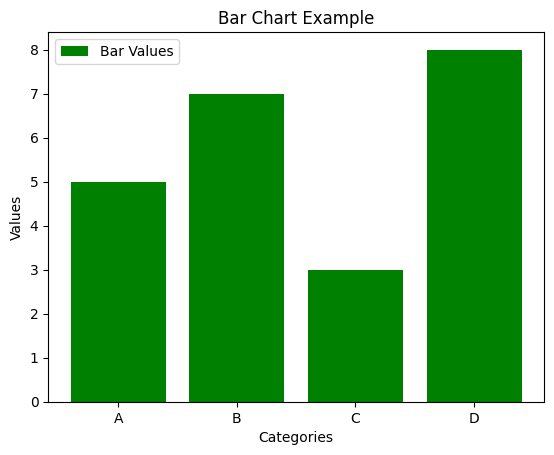

In [16]:
# Data for bar chart
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

# Create bar chart
plt.bar(categories, values, color='green', label='Bar Values')

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart Example")

# Show legend and plot
plt.legend()
plt.show()


## Histogram

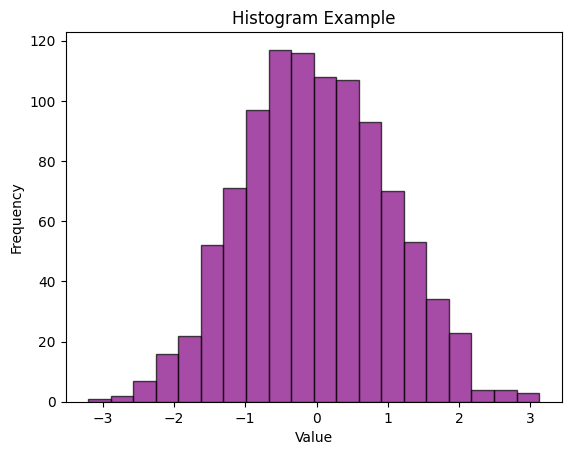

In [17]:
# Generate random data
data = np.random.randn(1000)

# Create histogram
plt.hist(data, bins=20, color='purple', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram Example")

# Show plot
plt.show()


## Pie Chart

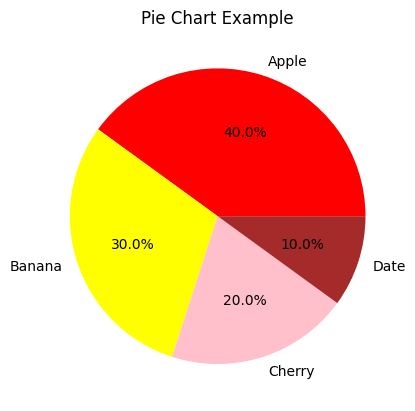

In [18]:
# Data for pie chart
labels = ['Apple', 'Banana', 'Cherry', 'Date']
sizes = [40, 30, 20, 10]

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'yellow', 'pink', 'brown'])

# Add title and show plot
plt.title("Pie Chart Example")
plt.show()


## Subplots & Multiple Plots

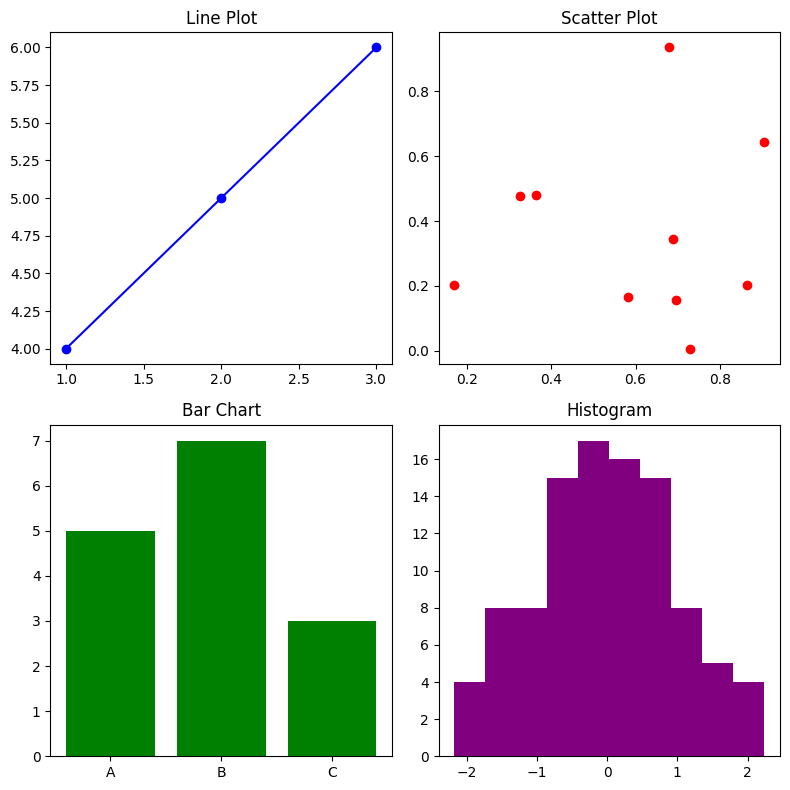

In [19]:
# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Line plot
axs[0, 0].plot([1, 2, 3], [4, 5, 6], 'b-o')
axs[0, 0].set_title("Line Plot")

# Scatter plot
axs[0, 1].scatter(np.random.rand(10), np.random.rand(10), color='r')
axs[0, 1].set_title("Scatter Plot")

# Bar chart
axs[1, 0].bar(['A', 'B', 'C'], [5, 7, 3], color='g')
axs[1, 0].set_title("Bar Chart")

# Histogram
axs[1, 1].hist(np.random.randn(100), bins=10, color='purple')
axs[1, 1].set_title("Histogram")

# Adjust layout and show
plt.tight_layout()
plt.show()


# Seaborn

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a built-in dataset in seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Scatter Plot

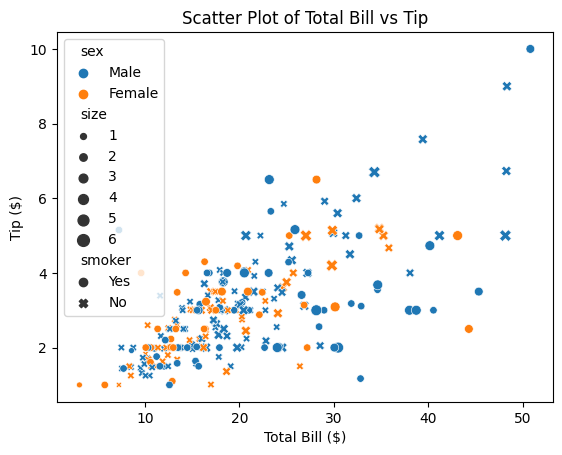

In [21]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker', size='size')

plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

## Bar Plot

<ipython-input-22-9929c0b777d9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="day", y="tip", data=tips, estimator=sum, ci=None, palette="Blues")
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


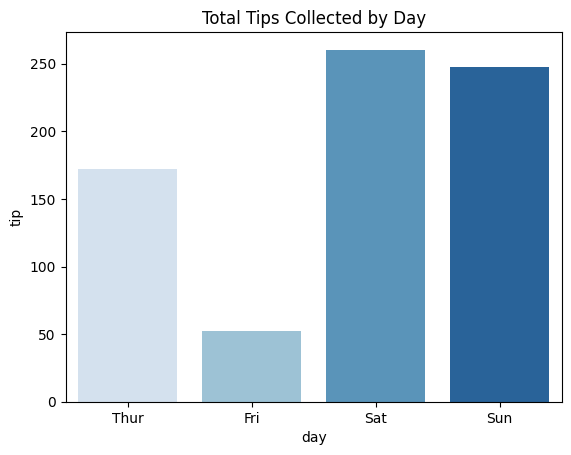

In [22]:
sns.barplot(x="day", y="tip", data=tips, estimator=sum, ci=None, palette="Blues")
plt.title("Total Tips Collected by Day")
plt.show()

# Histogram

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


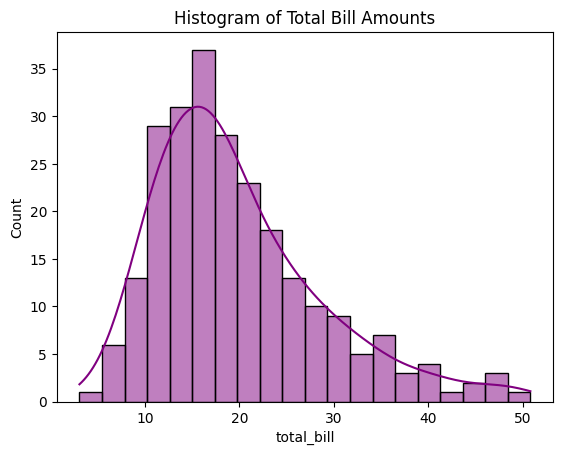

In [23]:
sns.histplot(tips['total_bill'], bins=20, kde=True, color='purple')
plt.title("Histogram of Total Bill Amounts")
plt.show()

## Pairplot & Heatmap
Pairplots show relationships between numerical features, while heatmaps show correlations.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

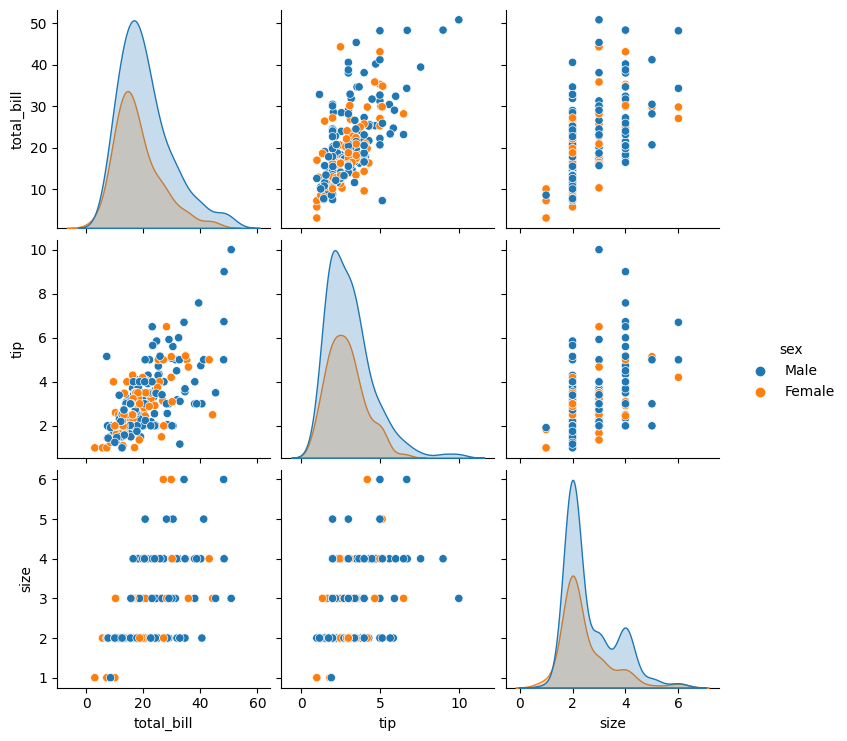

In [24]:
sns.pairplot(tips, hue="sex")
plt.show()


# Scikit-Learn

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix


import sklearn


## Loading & Splitting Data
Scikit-Learn provides datasets for easy access to ML models.

In [26]:
from sklearn.datasets import load_diabetes

# Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data into training & testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
